In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Mission 0 : Récupération et nettoyage des données


## Data_p7


In [2]:
data_p7=pd.read_csv("data-projet7.csv",sep=".")
#Afin d'avoir les colonnes income et gdpppp en int64... :
#J'ai modifié les "," du fichiers csv en "." et le déclare dans la fct read_csv.

In [3]:
data_p7.describe()
#gdpppp  gross domestic product (based on) purchasing power parity
#=salaire revenu moyen
#Produit intérieur brut (basée sur) la parité de pouvoir d'achat
#11599 lignes n'est pas normal.

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


In [4]:
data_p7.info()
#il manque 200 lignes gdpppp
#116 pays
#100 centiles classés du plus bas revenu au plus haut revenu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
country         11599 non-null object
year_survey     11599 non-null int64
quantile        11599 non-null int64
nb_quantiles    11599 non-null int64
income          11599 non-null float64
gdpppp          11399 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [5]:
data_p7.groupby("year_survey").count()/100
#donne le nombre de pays par année d'étude
#2008 n'est pas l'année la plus récente

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1.00,1.00,1.00,1.00,1.00
2006,5.00,5.00,5.00,5.00,5.00
2007,15.00,15.00,15.00,15.00,15.00
2008,75.99,75.99,75.99,75.99,74.99
2009,12.00,12.00,12.00,12.00,11.00
2010,6.00,6.00,6.00,6.00,6.00
2011,1.00,1.00,1.00,1.00,1.00


In [6]:
data_p7[data_p7.year_survey!=2008].groupby("country").mean()
#permet de visualiser tous les pays dont l'année d'étude est != 2008
#2004=Syrie
#2006=Ghana,Thailande, Venezuela,Philippines,Vietnam
#2011=Guatemala

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
BFA,2009.0,50.5,100.0,917.952658,1085.513900
BGD,2010.0,50.5,100.0,998.692409,1233.000000
BIH,2007.0,50.5,100.0,6334.687311,7472.000000
BTN,2007.0,50.5,100.0,1515.929061,4525.483051
CHL,2009.0,50.5,100.0,7051.609966,13390.000000
CHN,2007.0,50.5,100.0,2522.758726,5712.000000
CMR,2007.0,50.5,100.0,1794.493964,2007.000000
EGY,2009.0,50.5,100.0,1969.577399,5011.000000
GHA,2006.0,50.5,100.0,736.602529,1380.118200


In [7]:
data_p7=data_p7[(data_p7.year_survey!=2004)&(data_p7.year_survey!=2011)]
#j'enlève la Syrie et le Guatemala
#ainsi pour le reste des données
#je considère que l'année d'étude est 2008
#et traiterai les autres sans distinction
data_p7.groupby("year_survey").count()/100

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2006,5.00,5.00,5.00,5.00,5.00
2007,15.00,15.00,15.00,15.00,15.00
2008,75.99,75.99,75.99,75.99,74.99
2009,12.00,12.00,12.00,12.00,11.00
2010,6.00,6.00,6.00,6.00,6.00


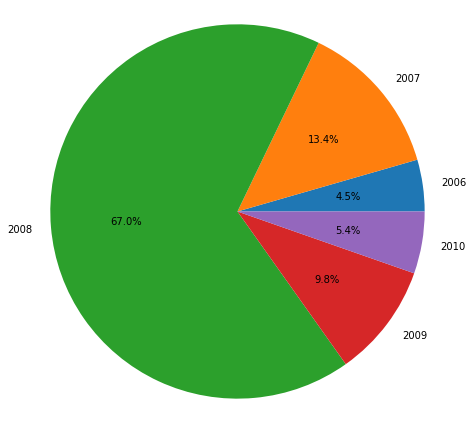

In [8]:
fig1,ax1=plt.subplots(figsize=(6,6))
ax1.pie(data_p7.groupby("year_survey").count()["gdpppp"],
        labels=np.sort(data_p7["year_survey"].unique()),
        autopct="%1.1f%%")
ax1.axis("equal")
plt.tight_layout()

plt.show()

In [9]:
#suite des inspections...
data_p7.groupby("country").count()[data_p7.groupby("country").count().values!=100]
#Il manque une ligne pour LTU
#et tous les gdpppp pour PSE et XKX



,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99
PSE,100,100,100,100,0
XKX,100,100,100,100,0


In [10]:
import os
import sqlite3

In [11]:
data_p7[data_p7["country"]=="LTU"][38:42]
#c'est le quantile 41 qui est manquant

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6238,LTU,2008,39,100,4802.3680,17571.0
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0
6241,LTU,2008,43,100,4950.6380,17571.0


In [12]:
incomequantile41LTU=data_p7.loc[6239].income+(data_p7.income[6240]-data_p7.income[6239])/2
#Je choisi de mettre en income la valeur intermédiaire entre les quantiles 40 et 42
line = pd.DataFrame({"country":"LTU", "year_survey":2008,"quantile":41,
                     "nb_quantiles":100,"income":incomequantile41LTU,"gdpppp":17571.0}, index=[6240])
data_p7 = pd.concat([data_p7.loc[:6239], line, data_p7.loc[6240:]]).reset_index(drop=True)
#je crée la ligne et je l'insère au bon endroit

In [13]:
#je remplis également les données manquantes gdpppp
data_p7.loc[data_p7["country"]=="PSE","gdpppp"]=3612.14
#Palestine
#Source "The Global Economy"
data_p7.loc[data_p7["country"]=="XKX","gdpppp"]=3254.86
#Kosovo
#Source "Banque Mondiale"

In [14]:
data_p7=data_p7[(data_p7["country"]!="FJI")]
#J'enlève également les Fidjis qui sont des énormes outliers au niveau gdpppp

In [15]:
data_p7.info()
#Après avoir enlevés 3 pays, rajouté le quantile 41 pour LTU,
#rentré les données gdpppp pour Palestine et Kosovo
#ma table est complète et exploitable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11300 entries, 0 to 11399
Data columns (total 6 columns):
country         11300 non-null object
year_survey     11300 non-null int64
quantile        11300 non-null int64
nb_quantiles    11300 non-null int64
income          11300 non-null float64
gdpppp          11300 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 618.0+ KB


## Data_Gini

In [16]:
Gini=pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_10181010/API_SI.POV.GINI_DS2_en_csv_v2_10181010.csv")

In [17]:
Gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              3 non-null float64
198

In [18]:
data_gini=Gini[["Country Code","2004","2005","2006","2007","2008","2009","2010","2011","2012"]]\
          .set_index("Country Code").dropna(how="all")
#Ceci me montre les pays pour lesquels j'ai au moins une donnée entre 2004 et 2012
#je vais me concentrer sur ces données qui me serviront
#pour représenter l'évolution de l'indice pour certains pays

data_gini=data_gini[data_gini.index.isin(data_p7.country.unique())]
#On récupère les pays qui nous intéressent

#Par ailleurs pour la suite je n'ai besoin que d'une seule valeur pour l'indice gini
#je vais donc calculer la moyenne sur les valeurs que j'ai ici
data_gini_mean=pd.DataFrame(data_gini.mean(axis=1),columns=["gini_moyen"])

In [19]:
pays_calcul_gini=data_p7[~data_p7["country"].isin(data_gini_mean.index)].country.unique()
pays_calcul_gini
#Les 6 pays présents dans data_p7 mais qui n'ont AUCUNE donnée de gini (entre 2004 et 2012) sont:
#l'Indonésie,le Cambodge, les Philippines,
#la Pologne, la Serbie, le Taiwan

array(['IDN', 'KHM', 'PHL', 'POL', 'SRB', 'TWN'], dtype=object)

In [20]:
#J'ai donc trouvé cette sympathique fonction permettant de calculer un indice Gini
#basé sur les valeurs qui lui sont passées 
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [21]:
d={}
for country in pays_calcul_gini:
    d["{}".format(country)]=gini(data_p7[data_p7.country==country]["income"])*100

#je crée un dictionnaire vide
#pour chaque pays listé précédemment comme n'ayant pas de gini:
#je calcule le gini et j'ajoute la ligne dans le dictionnaire 

In [22]:
for qqch in d:
    data_gini_mean.loc[qqch]=d[qqch]
    
#je crée ensuite les nouvelles lignes dans data_gini_mean

In [23]:
data_gini
#108 pays sur 9 ans

,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Code,,,,,,,,,
ALB,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0
ARG,48.3,47.7,46.6,46.3,44.5,43.9,43.0,42.3,41.2
ARM,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6
AUT,29.8,28.7,29.6,30.6,30.4,31.5,30.3,30.8,30.5
AZE,16.2,16.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEL,30.5,29.3,28.1,29.2,28.4,28.5,28.4,28.1,27.5
BFA,NaN,NaN,NaN,NaN,NaN,39.8,NaN,NaN,NaN
BGD,NaN,33.2,NaN,NaN,NaN,NaN,32.1,NaN,NaN
BGR,NaN,NaN,35.7,36.1,33.6,33.8,35.7,34.3,36.0


In [24]:
data_gini_mean.info()
#113 pays, valeur unique (centré 2008)

#Pour utilisation ultérieure:
data_gini_mean=data_gini_mean.reset_index().rename(columns={"Country Code":"country"})

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, ALB to TWN
Data columns (total 1 columns):
gini_moyen    113 non-null float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [25]:
data_gini_mean

,country,gini_moyen
0,ALB,29.866667
1,ARG,44.866667
2,ARM,31.177778
3,AUT,30.244444
4,AZE,16.400000
5,BEL,28.666667
6,BFA,39.800000
7,BGD,32.650000
8,BGR,35.028571
9,BIH,33.366667


## Population

In [26]:
population=pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_10203548/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv")
#source : WID
population=population[["Country Code",'Country Name',"2008"]].rename(columns={"Country Code":"country","2008":"population","Country Name":"countryname"})

In [27]:
pd.merge(population,data_p7,on="country").groupby("country").mean().sum()["population"]
#je merge population avec data_p7
#je fais un groupby sur lequel je fais une moyenne 
#( car dans chaque pays, la ligne population a la même valeur partout )
#puis une somme afin d'obtenir

#la population couverte par notre étude

6152445942.0

In [28]:
6616356000
#population mondiale totale en 2008 ( source : FAO )

6616356000

In [29]:
6153289282/6616356000
#notre étude couvre donc 93% de la population !

0.9300118194970162

## Elasticity

In [30]:
elasticity=pd.read_csv("GDIMMay2018.csv")[["countryname","IGEincome"]].groupby("countryname").mean().reset_index()
#j'applique directement des transformations pour la rendre exploitable...
#je ne garde que le pays et le IGEincome(=elasticity)
#il reste pleins de ligne identiques pour chaque pays donc je groupby puis mean()
#et reset_index pour la facilité d'utilisation

In [31]:
elasticity.info()
#150 pays,75 indices elasticity

#mais quelle population est représentée sous ces 75 indices Gini ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
countryname    150 non-null object
IGEincome      75 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [32]:
population_elasticity=pd.merge(elasticity,population,how="left")

In [33]:
population_elasticity[~population_elasticity["IGEincome"].isna() & ~population_elasticity["population"].isna()]
#je ne regarde que les pays qui ont une donnée elasticity et population
#74 pays

,countryname,IGEincome,country,population
1,Albania,0.815874,ALB,2.947314e+06
5,Australia,0.275000,AUS,2.124920e+07
6,Austria,0.245267,AUT,8.321496e+06
8,Bangladesh,0.538000,BGD,1.488058e+08
9,Belarus,0.342738,BLR,9.527985e+06
10,Belgium,0.183176,BEL,1.070997e+07
11,Benin,0.855116,BEN,8.696916e+06
13,Bolivia,0.866268,BOL,9.599855e+06
14,Bosnia and Herzegovina,0.827252,BIH,3.763599e+06
16,Brazil,0.635000,BRA,1.929790e+08


In [34]:
population_elasticity[~population_elasticity["IGEincome"].isna()].sum()["population"]/6616356000
#78,6% de la population

#conclusion :
#si j'étudie 93% de la population totale sur 113 pays...
#et que j'ai une valeur IGEincome pour 78,6% de la population totale
#je considère assez aisément que je peux utiliser la moyenne d'IGEincome
#pour combler les données manquantes dans mon étude

0.7857893558024991

In [35]:
mean_elasticity=population_elasticity[~population_elasticity["IGEincome"].isna()].mean()["IGEincome"]
mean_elasticity
#elasticité moyenne calculée
#sur 78,6% de la population divisée en 74 pays

0.515403952

In [36]:
elasticity_pays=population_elasticity.drop(columns=["countryname","population"])
#pour l'instant je vais juste garder le pays et le IGEincome

In [37]:
elasticity_pays=elasticity_pays.dropna(how="all")
#A cause du Swaziland... j'ai une ligne vide... Je la retire

In [38]:
elasticity_pays
#149 pays, 74 indices

,IGEincome,country
0,NaN,AFG
1,0.815874,ALB
2,NaN,AGO
3,NaN,ARG
4,NaN,ARM
5,0.275000,AUS
6,0.245267,AUT
7,NaN,AZE
8,0.538000,BGD
9,0.342738,BLR


## Assemblage des données


In [39]:
data_p7_elasticity=pd.merge(data_p7,elasticity_pays,how="left").fillna(mean_elasticity)
#merge data_p7 et IGM_pays, fillna() avec la moyenne calculée précédemment

In [40]:
data_p7_full=pd.merge(data_p7_elasticity,data_gini_mean)
data_p7_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11300 entries, 0 to 11299
Data columns (total 8 columns):
country         11300 non-null object
year_survey     11300 non-null int64
quantile        11300 non-null int64
nb_quantiles    11300 non-null int64
income          11300 non-null float64
gdpppp          11300 non-null float64
IGEincome       11300 non-null float64
gini_moyen      11300 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 794.5+ KB


In [41]:
#A ce stade nous avons :
#df data_p7 , 113 pays , complet
#df data_gini , 102 pays avec au moins une donnée , 9 années (de 2004 à 2012), incomplet
#df data_gini_mean, 113 pays , complet
#df population qui ne nous servira plus
#df IGM_pays, 149 pays , incomplet
#df data_p7_full, 113 pays, complet

In [42]:
data_p7.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11300.000000,11300.000000,11300.0,11300.000000,11300.000000
mean,2007.991150,50.500000,100.0,6186.647081,12588.984060
std,0.792651,28.867347,0.0,9497.812388,13236.349992
min,2006.000000,1.000000,100.0,16.719418,303.193050
25%,2008.000000,25.750000,100.0,920.853250,2576.000000
50%,2008.000000,50.500000,100.0,2493.765800,7560.000000
75%,2008.000000,75.250000,100.0,7750.644350,18004.000000
max,2010.000000,100.000000,100.0,176928.550000,73127.000000


# Mission 1: résumer les données

Dans data_p7_full,
les années étudiées varient entre 2006 et 2010, avec une grande majorité en 2008
pour la suite nous considérerons que nous travaillons sur l'année 2008 avec toutes les données
113 pays sont présents, 93% de la population mondiale est étudiée

Les données de la world income distribution présentent pour chaque pays
les quantiles de la distribution des revenus de leur population respective.

De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?

il s'agit de centiles

Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

les quantiles sont une bonne méthode car ils permettent de classer une valeur rapidement

$PPP signifie que les montants sont ramenés sur une échelle commune en divisant 
le pouvoir d'achat d'une monnaie par une autre

autrement dit : n'importe ou dans le monde, 10$PPP ont exactement la même valeur en terme de pouvoir d'achat

# Mission 2: visualisation des données


In [43]:
data_gini.dropna(how="any")
#Je veux que les 9 pays que je vais regarder ait des données pour chaque année

,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Code,,,,,,,,,
ARG,48.3,47.7,46.6,46.3,44.5,43.9,43.0,42.3,41.2
ARM,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6
AUT,29.8,28.7,29.6,30.6,30.4,31.5,30.3,30.8,30.5
BEL,30.5,29.3,28.1,29.2,28.4,28.5,28.4,28.1,27.5
BLR,26.5,27.6,28.3,29.6,27.8,27.7,28.6,27.2,26.5
CRI,48.3,47.5,49.4,49.3,48.7,50.6,48.2,48.7,48.6
CYP,30.1,30.3,31.1,31.1,31.7,32.1,31.5,32.6,34.3
CZE,27.5,26.9,26.7,26.0,26.3,26.2,26.6,26.4,26.1
DNK,24.9,25.2,25.9,26.2,25.2,26.7,27.2,27.3,27.8


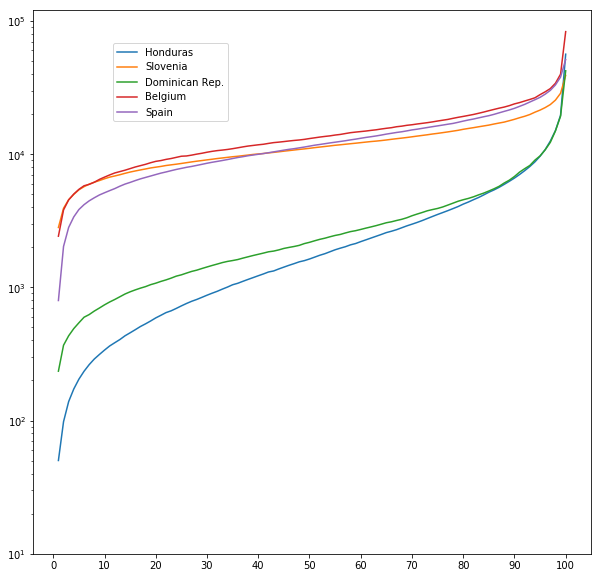

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(data_p7_full[data_p7_full["country"]=="HND"].groupby("quantile").sum()["income"])
plt.plot(data_p7_full[data_p7_full["country"]=="SVN"].groupby("quantile").sum()["income"])
plt.plot(data_p7_full[data_p7_full["country"]=="DOM"].groupby("quantile").sum()["income"])
plt.plot(data_p7_full[data_p7_full["country"]=="BEL"].groupby("quantile").sum()["income"])
plt.plot(data_p7_full[data_p7_full["country"]=="ESP"].groupby("quantile").sum()["income"])

ax.set_yscale('log')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_yticks([10,100,1000,10000,100000])
fig.legend(("Honduras","Slovenia","Dominican Rep.","Belgium","Spain"),
            loc='upper left', bbox_to_anchor=(0.15,0.75))
plt.show()
#Honduras gini = 54
#Slovenia gini = 24
#Dom Rep. gini = 48
#Belgium gini = 28
#ESP gini = 34

In [45]:
def lorenz_curve(X):
    #récupérer le pays
    country=X.index.unique().values[0]
    #récupérer les valeurs et calculer les valeurs lorenz
    X_lorenz = X.values.cumsum() / X.values.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    fig, ax = plt.subplots(figsize=[7,7])
    #placer les points de la courbe de Lorenz dans le graph ( ramenés en % )
    ax.scatter((np.arange(X_lorenz.size)/(X_lorenz.size-1)*100), X_lorenz*100, 
               color='blue', s=10,label=country)
    #la ligne d'égalité
    ax.plot([0,100], [0,100], color='k')
    #nommer les axes
    plt.xlabel("% des classes de revenu")
    plt.ylabel("% des richesses")
    plt.legend()
    plt.savefig("{}".format(country)+"_lorenz.png")
    plt.show()

In [46]:
lorenz_hnd=data_p7_full[data_p7_full.country=="HND"][["income","country"]].set_index("country")
lorenz_svn=data_p7_full[data_p7_full.country=="SVN"][["income","country"]].set_index("country")
lorenz_dom=data_p7_full[data_p7_full.country=="DOM"][["income","country"]].set_index("country")
lorenz_bel=data_p7_full[data_p7_full.country=="BEL"][["income","country"]].set_index("country")
lorenz_esp=data_p7_full[data_p7_full.country=="ESP"][["income","country"]].set_index("country")

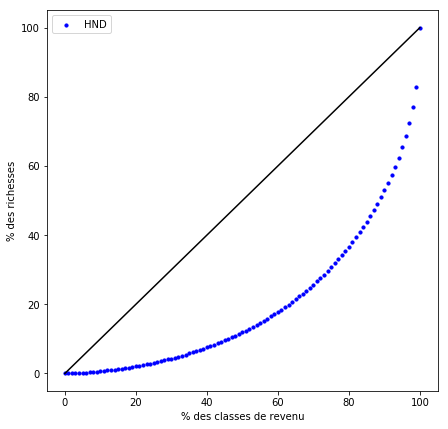

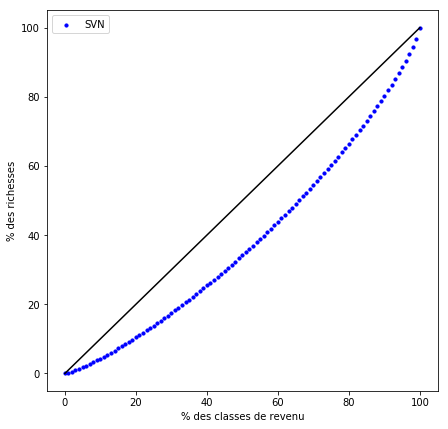

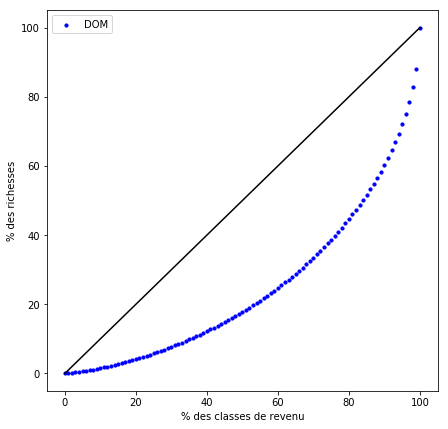

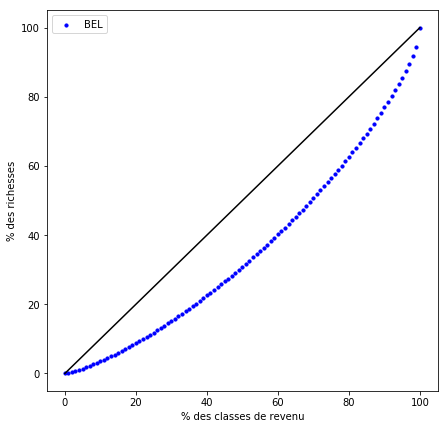

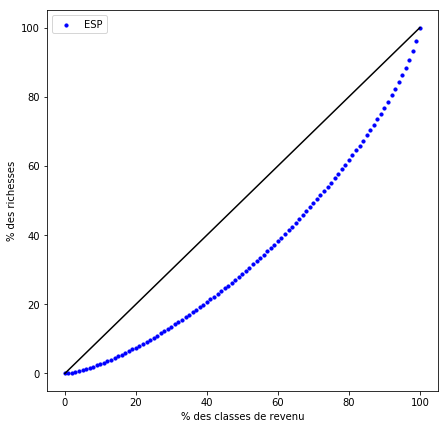

In [47]:
lorenz_curve(lorenz_hnd)
lorenz_curve(lorenz_svn)
lorenz_curve(lorenz_dom)
lorenz_curve(lorenz_bel)
lorenz_curve(lorenz_esp)

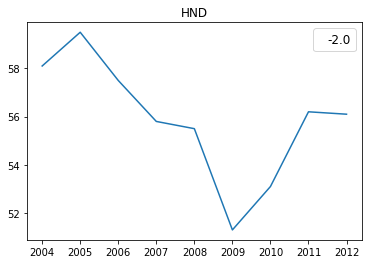

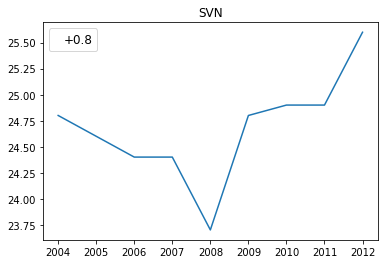

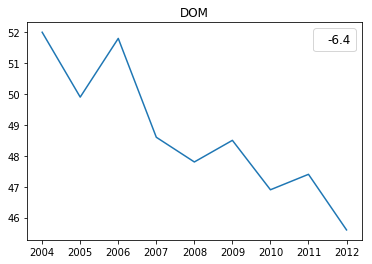

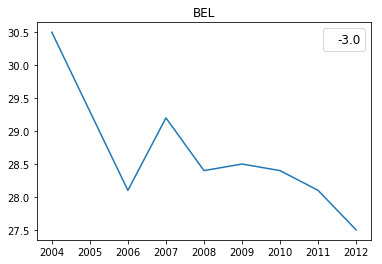

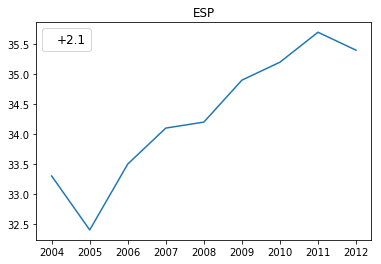

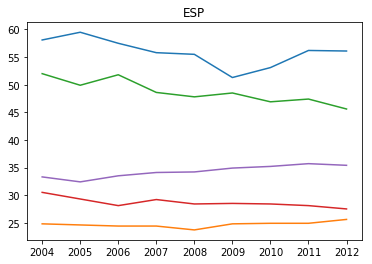

In [48]:
plt.rcParams['legend.handlelength'] = 0
for counntry in ["HND","SVN","DOM","BEL","ESP"]:
    plt.plot(data_gini.columns,
             data_gini[data_gini.index==counntry].values[0])
    plt.title(counntry)
    evolution=data_gini[data_gini.index==counntry].values[0][8]-data_gini[data_gini.index==counntry].values[0][0]
    evolution=round(evolution,2)
    if evolution>0:
        evolution=("+{}".format(evolution))
    plt.legend([evolution],fontsize="large")
    plt.show() 
    #pour les graphs individuels

for counntry in ["HND","SVN","DOM","BEL","ESP"]:
    plt.plot(data_gini.columns,
             data_gini[data_gini.index==counntry].values[0])
    plt.title(counntry)
plt.show()


#graph commun 
#et individuels

In [49]:
data_gini_mean.sort_values(by="gini_moyen").reset_index(drop=True).head()
#gini triés par valeur, les 5 plus bas
#Azerbaijan
#Slovenie
#Danemark
#Tchequie
#Slovaquie

,country,gini_moyen
0,AZE,16.400000
1,SVN,24.677778
2,DNK,26.266667
3,CZE,26.522222
4,SVK,26.666667


In [50]:
data_gini_mean.sort_values(by="gini_moyen").reset_index(drop=True).tail()
#Colombie
#Brésil
#Honduras
#République Centrafricaine
#Afrique du Sud

,country,gini_moyen
108,COL,54.242857
109,BRA,54.562500
110,HND,55.900000
111,CAF,56.200000
112,ZAF,63.733333


In [51]:
data_gini_mean.sort_values(by="gini_moyen").reset_index(drop=True)[30:35]
#33ème position avec 32

,country,gini_moyen
30,KGZ,31.711111
31,KOR,31.900000
32,FRA,32.033333
33,JPN,32.100000
34,TJK,32.200000


In [52]:
data_gini_mean.sort_values(by="gini_moyen").reset_index(drop=True)[11:16]
#14ème avec 28.6

,country,gini_moyen
11,TLS,27.800000
12,ISL,28.555556
13,BEL,28.666667
14,NLD,28.744444
15,IRQ,29.050000


# Mission 3: Génération de données, calcul de distribution

In [53]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

#cette fct a pour but de retourner y_child et y_parents
#n est le nbre d'éléments dans l'array
#pj est le coefficient d'elasticité ( mobilité intergénérationnelle des revenus )

In [54]:
# !!! Fonction pour une fonction !!!
def quantiles(l, nb_quantiles):
    size = len(l)
    #taille de l'échantillon
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    #tri des valeurs
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    #création des quantiles
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    #association des quantiles aux y_child, y_parents
    return pd.Series([q_dict[e] for e in l])

#cette fct a pour but de créer un array composés de l éléments
#auxquels est associé un chiffre entre 1 et nb_quantiles

In [55]:
def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    #conversion en Series
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    #création des quantiles associés aux y_child et y_parents
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    #mise bout a bout
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    #renommage des colonnes
    return sample

#cette fonction met bout à bout ce qu'on a crée avec les deux fcts précédentes :
#y_child,y_parents, c_i_child (=quantiles(y_child,nb_quantiles)) puis c_i_parents

In [56]:
# !!! Fonction pour une fonction !!!
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    #nb total de cas = 100000
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1): # pour chaque quantile_parent entre 1 et 100
        subset = counts[counts.c_i_parent == q_p] #crée un sous-échantillon de ce quantile
        if len(subset): #si le sous-échantillon n'est pas vide
            nb = subset["counts"].values[0] #la distribution est calculée
            distrib += [nb / total] #ramenée en portion du total et ajouté a la variable
        else:
            distrib += [0]
    return distrib

#cette fct est crée uniquement pour être utilisée dans la fonction suivante.
#elle établit ( dans le subset déja crée avec c_i_child=x ) dans conditional_distributions()
#un nouveau subset pour chaque classe de revenu de parents existants dans le premier.

In [57]:
def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1: # pour chaque child_quantile entre 1 et 100
        subset = counts[counts.c_i_child == child_quantile]#crée un subset de ce quantile
        mat += [distribution(subset, nb_quantiles)]#applique distribution() au subset
        #et rajoute le résultat dans "mat"
    return np.array(mat)

#en gros chaque cas (c_i_child = x & c_i_parent = y)
#est évalué, et ramené en portion du total

In [58]:
def condi_pays(n, nb_quantiles, pj_pays):
    y_child,y_parents = generate_incomes(n,pj = pj_pays)
    sample = compute_quantiles(y_child,y_parents,nb_quantiles)
    cd = conditional_distributions(sample,nb_quantiles)
    return cd

#Une fonction pour les réunir toutes...
#nb_quantiles et n ne varient pas, il ne manque que le pj_pays et la fonction sort 
#"cd" la distribution conditionelle des 100 quantiles enfants
#=pour un quantile, la probabilité d'appartenance du parent a un autre quantile

In [59]:
data_clones=data_p7_full.append([data_p7_full]*499)

In [60]:
data_clones=data_clones.sort_values(by=["country","quantile"]).reset_index(drop=True)

In [61]:
import time
start_time=time.time()

elements = np.arange(100)+1 #crée une liste de 100 nombres de 1 a 100
nb_quantiles=100
n=1000*nb_quantiles

quantiles_associes=[]
for elasticity_pays in data_clones.groupby(["country"]).mean()['IGEincome']:#pour chaque pays
    probabilites=condi_pays(n,nb_quantiles,elasticity_pays)
    #je calcule l'entièreté de la distribution pour tous les quantiles
    for z in range(100):#pour chaque quantile enfant:
        probabilites_quantile_z=probabilites[z]
        #je récupère le zieme quantile
        quantile_associe=np.random.choice(elements, 500, p=probabilites_quantile_z)
        #et je genère un nouvel array basé sur la distribution de ce quantile
        quantiles_associes+=[quantile_associe]
        #je crée une liste d'arrays
        
quantiles_associes_merged=[j for i in quantiles_associes for j in i]
#Je fais d'une liste d'arrays un "super-array",prêt a être collé sur le reste de mes données
data_anova=pd.concat([data_clones,pd.Series(quantiles_associes_merged)],axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 948.8244323730469 seconds ---


In [62]:
data_anova=data_anova.rename(columns={0:"classe_revenu_parent"}).drop(columns=["year_survey","nb_quantiles","quantile"])

# Mission 4: ANOVA et régression


## ANOVA

In [63]:
data_anova.corr()
#on n'observe pas de fortes corrélations entres les variables explicatives
#il est intéressant de noter que l'income a une (faible) corrélation négative avec le coefficient gini

,income,gdpppp,IGEincome,gini_moyen,classe_revenu_parent
income,1.000000,0.667767,-0.327563,-0.239506,0.161402
gdpppp,0.667767,1.000000,-0.489985,-0.363265,-0.000406
IGEincome,-0.327563,-0.489985,1.000000,0.451113,0.000389
gini_moyen,-0.239506,-0.363265,0.451113,1.000000,0.000561
classe_revenu_parent,0.161402,-0.000406,0.000389,0.000561,1.000000


In [64]:
#on cherche a expliquer le revenu des enfants
#en utilisant le pays comme variable explicative

#ou plutôt : on cherche a savoir si il y'a une différence statistiquement significative
#des moyennes de revenus selon le pays

#on définit tout d'abord 6 caractéristiques de notre df:

k = len(pd.unique(data_anova.country))  
# number of conditions ( 113 = nb de pays )
N = len(data_anova.values)  
# conditions times participants ( 5700000 = nb de pays * nb d'individus )
n = data_anova.groupby('country').size()[0] 
#Participants in each condition ( 50 000 nb d'individus par pays )

DFbetween = k - 1
#degrés de libertés entre les groupes ( 113 )
DFwithin = N - k
#degrés de libertés dans les groupes (5700000-113 )
DFtotal = N - 1
#degrés de libertés totales

In [65]:
#j'applique ensuite les formules pour obtenir les variabilités inter et intra classe
SSbetween = (sum(data_anova.groupby("country").sum()["income"]**2)/n) \
    - (data_anova["income"].sum()**2)/N

sum_y_squared = sum([value**2 for value in data_anova["income"].values])
SSwithin = sum_y_squared - sum(data_anova.groupby('country').sum()['income']**2)/n

In [66]:
SStotal = sum_y_squared - (data_anova['income'].sum()**2)/N
SStotal
#variabilité totale

509632582621457.5

In [67]:
MSbetween = SSbetween/DFbetween
#VARIANCE interclasse
#MeanSquarebetween
MSwithin = SSwithin/DFwithin
#VARIANCE intraclasse
#MeanSquarewithin

In [68]:
F = MSbetween/MSwithin
F
#stat de test de l'anova
#F stands for Fischer
#rapport entre les variances inter et intra classes

49355.16624353445

In [69]:
p = st.f.sf(F, DFbetween, DFwithin)
p

0.0

In [70]:
st.f.cdf(F,DFbetween, DFwithin)

0.9999999999999999

In [71]:
eta_sqrd = SSbetween/SStotal
eta_sqrd

0.4945378406868082

In [72]:
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)
om_sqrd

0.4945277764630599

## Régression

### Version 2 variables sans ln

In [73]:
Y=data_anova["income"].values
X=data_anova[["gdpppp","gini_moyen"]]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model=LinearRegression().fit(X_train,Y_train)
model.score(X_test,Y_test)

0.446979354126288

In [74]:
model.coef_

array([0.48052608, 4.71670059])

In [75]:
model.intercept_

-36.62625478971586

### Version 3 variables sans ln

In [76]:
Y=data_anova["income"]
X=data_anova[["gdpppp","gini_moyen","classe_revenu_parent"]]
X_train,X_test,y_train,y_test=train_test_split(X,Y)
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.4708275610808029

In [77]:
model.coef_

array([ 0.48012525,  4.14016297, 53.14324611])

### Version 2 variables avec ln

In [78]:
Y=np.log(data_anova["income"])
X=pd.concat([np.log(data_anova["gdpppp"]),data_anova["gini_moyen"]],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model=LinearRegression().fit(X_train,Y_train)
model.score(X_test,Y_test)

0.664010780316659

In [79]:
model.coef_

array([ 0.86016768, -0.01806208])

### Version 3 variables avec ln

In [80]:
y=np.log(data_anova["income"])
X=pd.concat([np.log(data_anova["gdpppp"]),data_anova[["gini_moyen","classe_revenu_parent"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y)
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.7139811393706554

In [81]:
model.coef_
#Il est évident que le revenu salaire moyen du pays est le premier facteur déterminant
#il est logique que le gini ait un signe négatif
#il est étonnant de voir le peu d'importance de la classe_revenu_parent

array([ 0.86006363, -0.01815586,  0.01061706])

In [82]:
#résultat de perf ( r^2 ) se calcule sur l'échantillon de test

In [83]:
model.coef_[0]/model.coef_[2]

81.00771003192466

In [84]:
from sklearn import metrics

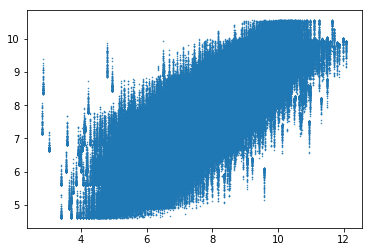

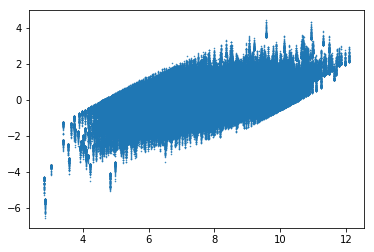

In [85]:
plt.plot(y_test,model.predict(X_test),'.',markersize=1)
plt.show()
#QQplot

plt.plot(y_test, y_test-model.predict(X_test),'.',markersize=1)
plt.show()

In [86]:
#conclusions : ....

In [87]:
sorted_income=data_p7["income"].sort_values()

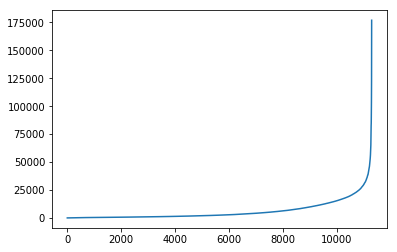

In [88]:
plt.plot(sorted_income.values)

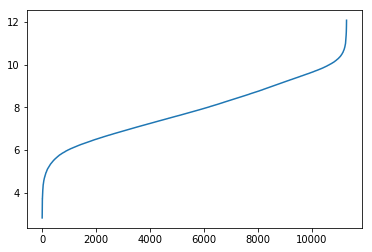

In [89]:
plt.plot(np.log(sorted_income.values))

In [ ]:
#ESN Entreprise du service numérique
#candidature spontanée